# Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Functions for simulation
from MMn import simulate_MMn
from MMn_SJF import simulate_MMn_SJF
from MDn import simulate_MDn
from MLn import simulate_MLn

# Functions used for analysis
from Analysis import *
from ExpectedWaitTime import expectedWait

# Constant Parameters

In [14]:
customers = 1000000
mu = 1

# For multiple rho's and multiple servers
ns = [1, 2, 4]
rhos = np.linspace(0.7, 0.99, 25)

# Problem 2.1: Expected vs Measured  

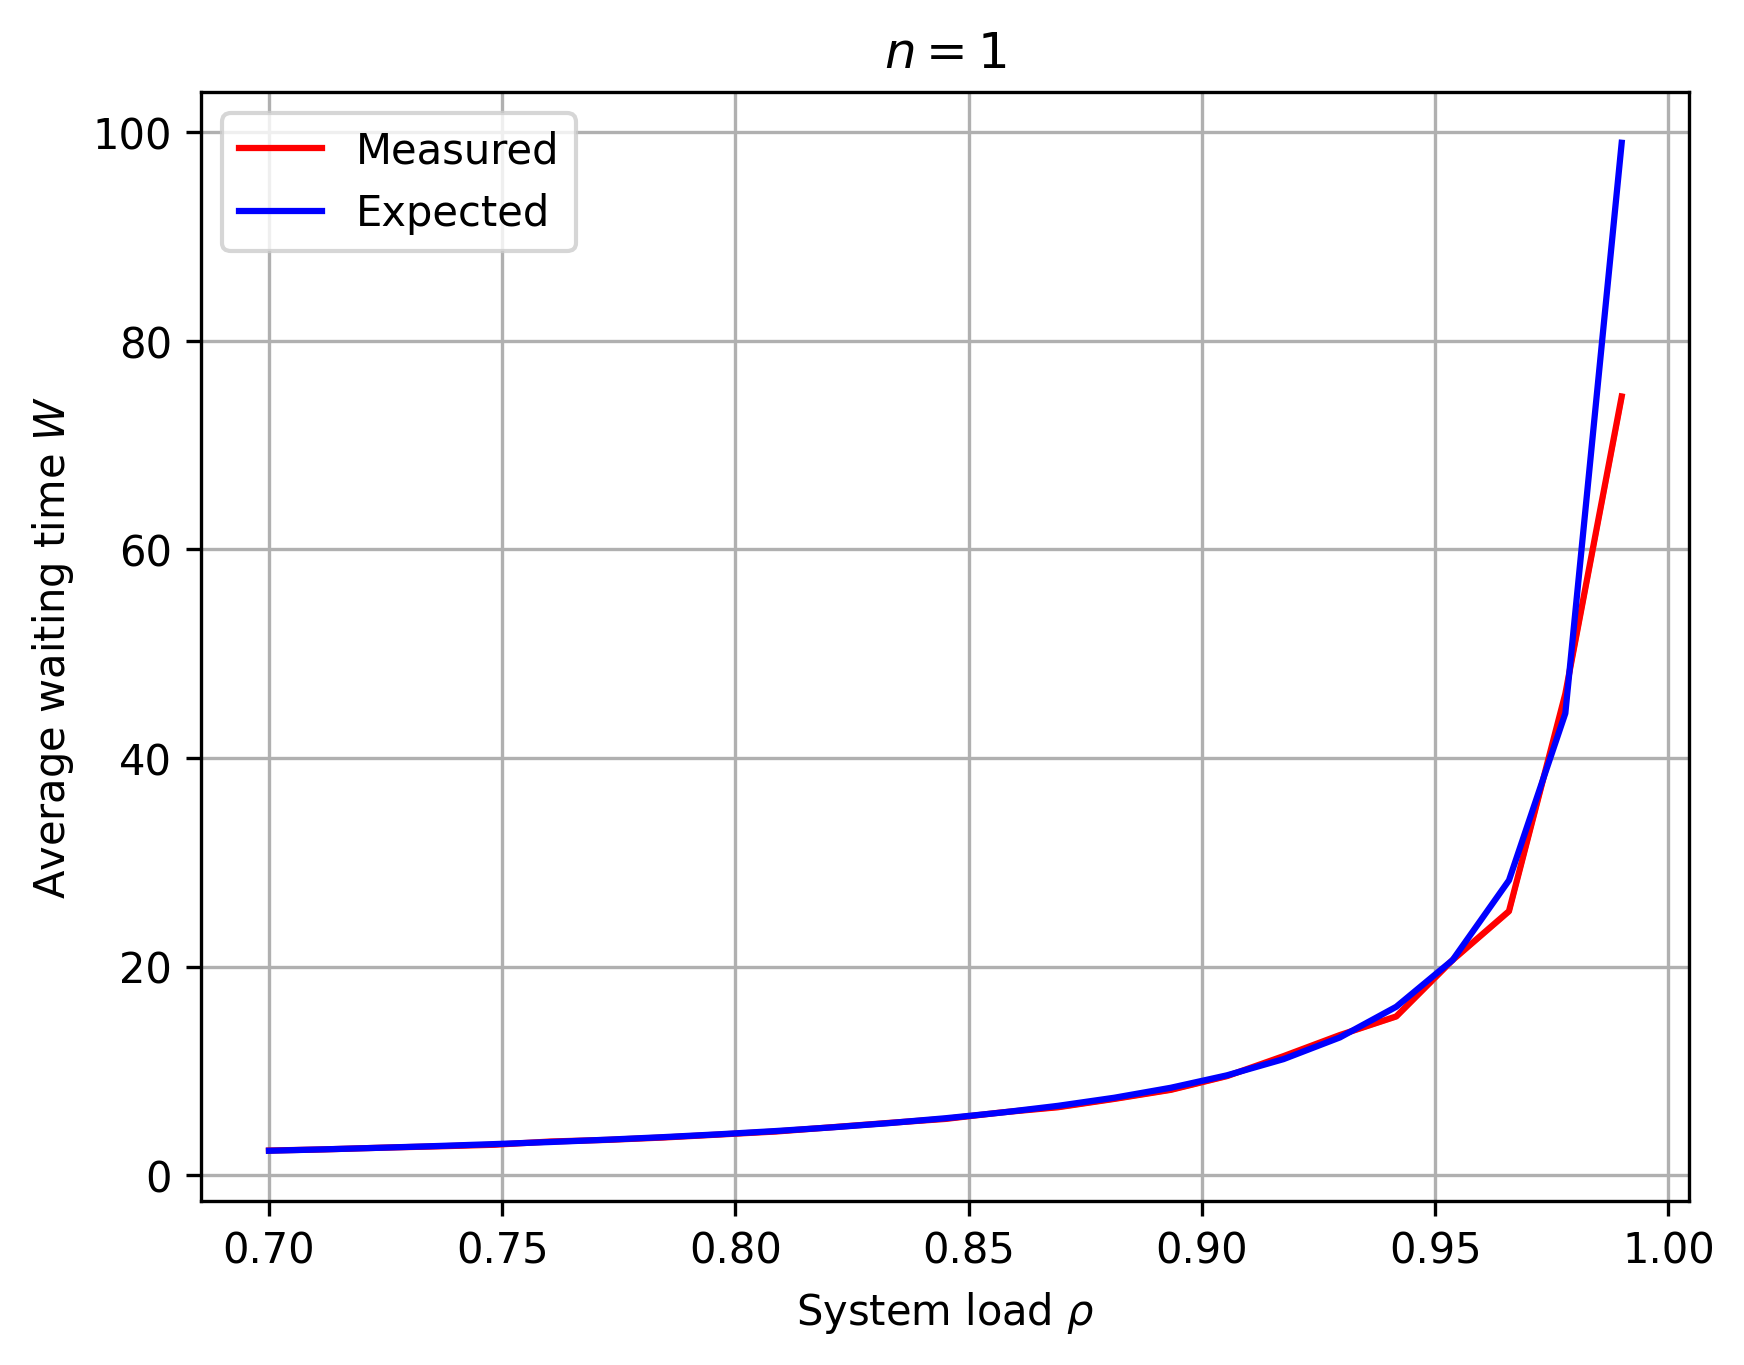

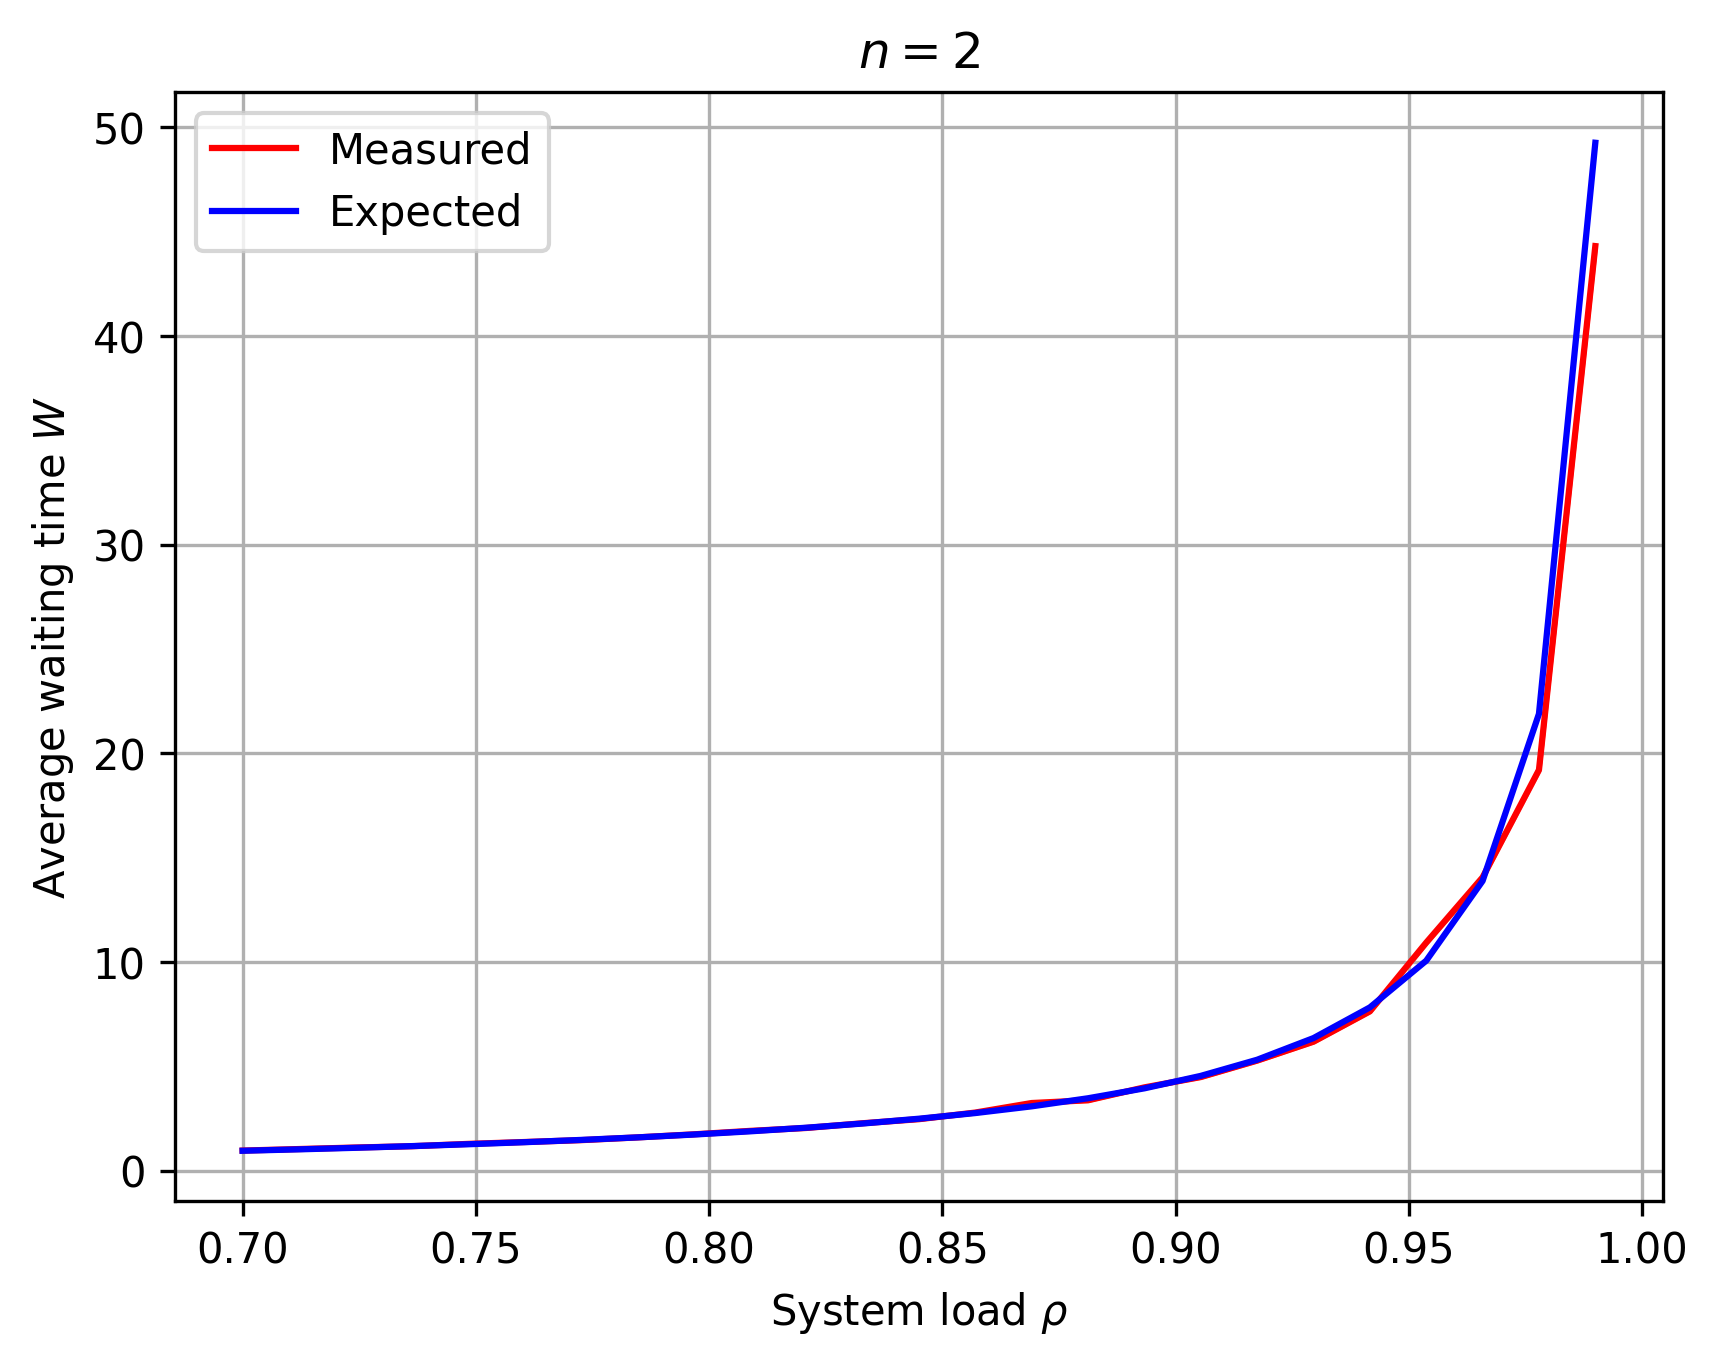

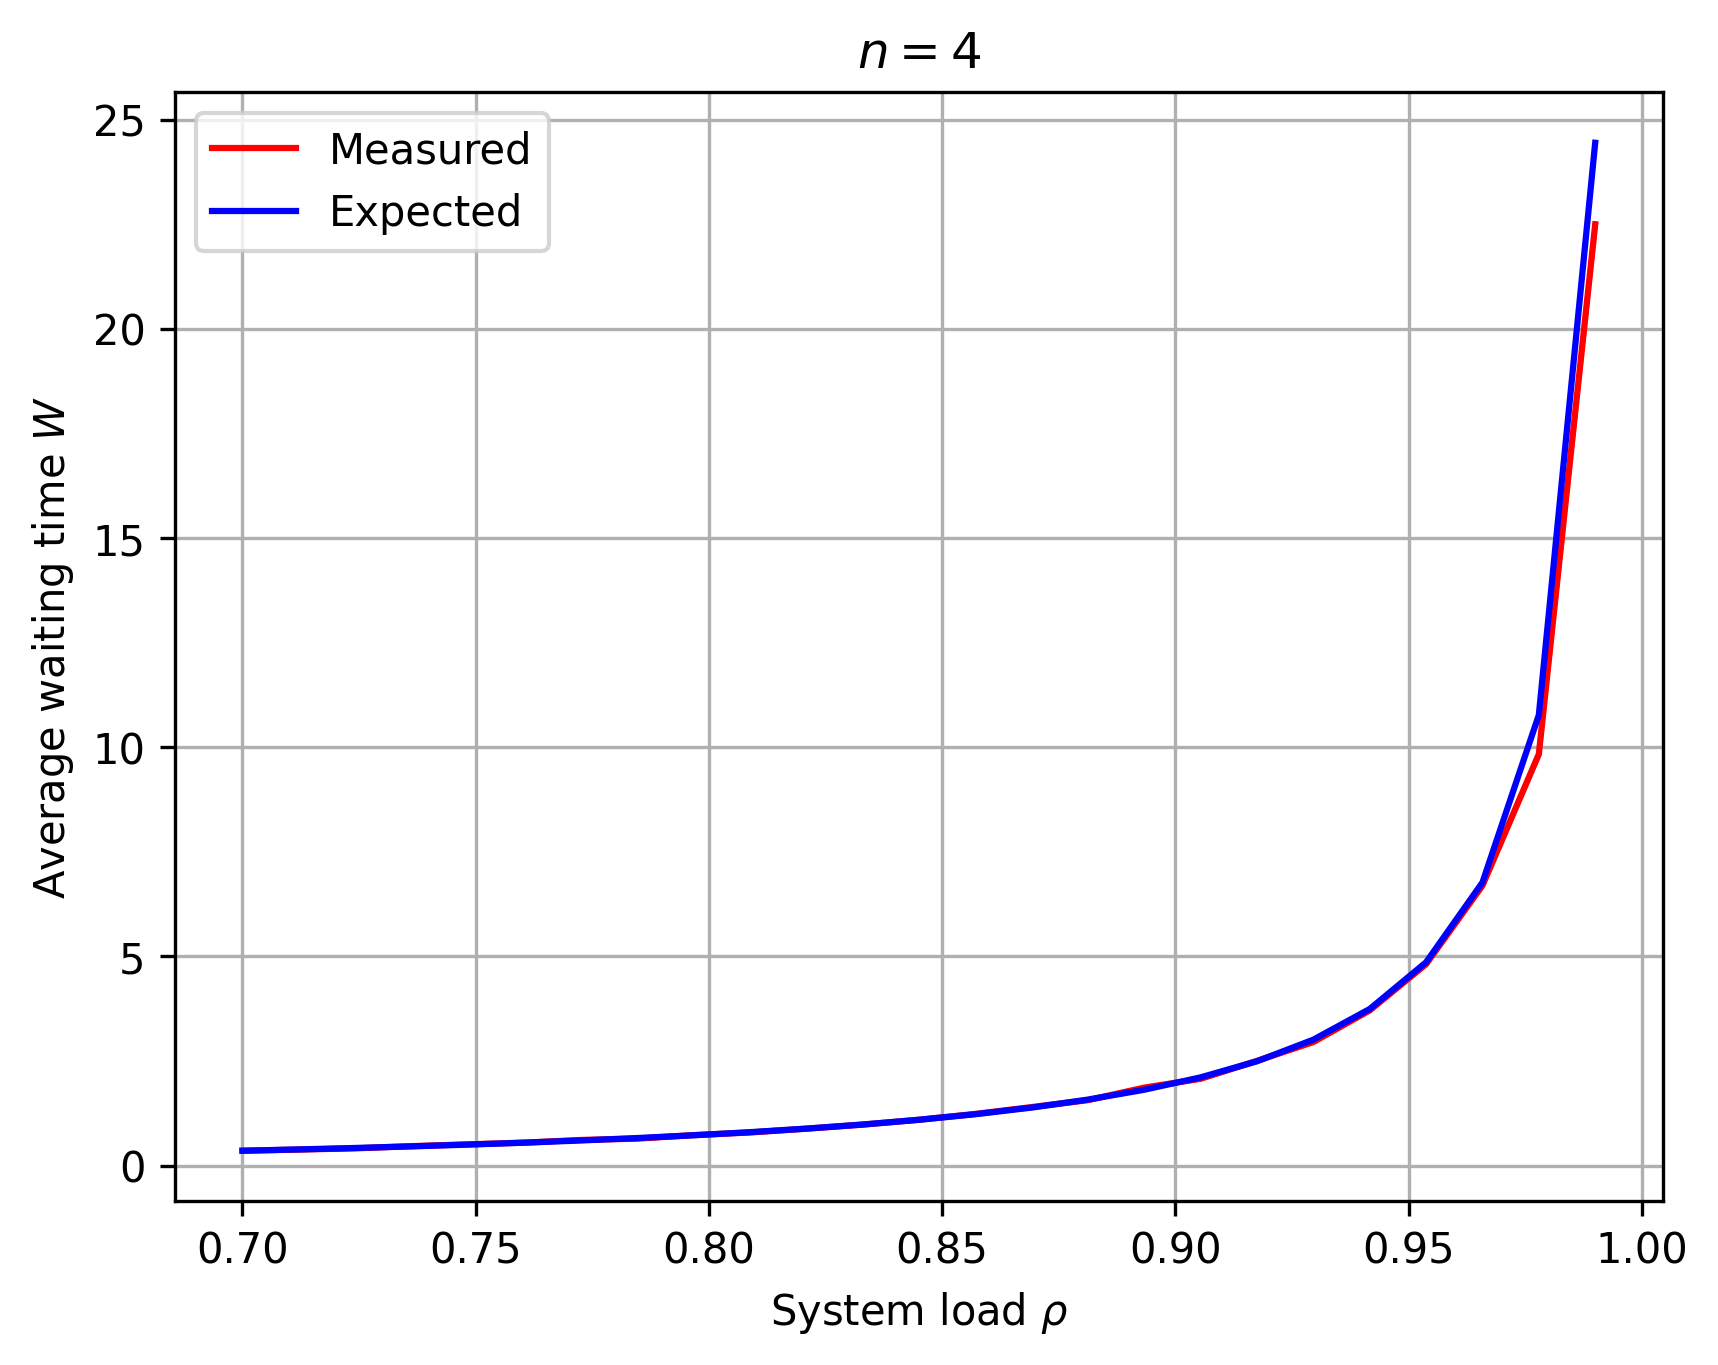

In [15]:
for n in ns:
    # Create figure
    fig, ax = plt.subplots()
    fig.dpi = 300
    
    # Lists used to store results
    results = []
    
    # Lists used to store results
    for rho in rhos:
        # Simulate system
        waiting = simulate_MMn(customers, rho, mu, n)
        
        # Get average and confidence
        avg, conf = statistics(waiting, print_info=False)
        
        # Expected waiting time
        expected = expectedWait(rho, mu, n)
        
        # Add to results
        results.append([avg, conf, expected])
    
    # Convert to numpy array
    results = np.array(results)
    
    # Save results
    np.savetxt('results/MMn_FIFO.txt', results)
    
    # Left and right interval
    left = results[:, 0] - results[:, 1]
    right = results[:, 0] + results[:, 1]
    
    # Plotting
    ax.plot(rhos, results[:, 0], label='Measured', color='red')
    ax.fill_between(rhos, left, right, color='red', alpha=0.5)
    ax.plot(rhos, results[:, 2], color='blue', label='Expected')
    
    # Plot settings
    ax.legend()
    ax.set_title(f'$n = {n}$')
    ax.set_xlabel('System load $\\rho$')
    ax.set_ylabel('Average waiting time $W$')
    ax.grid()
    
    # Save figure
    fig.savefig(f'results/MM{n}.jpg', dpi=300)
        

# Problem 3

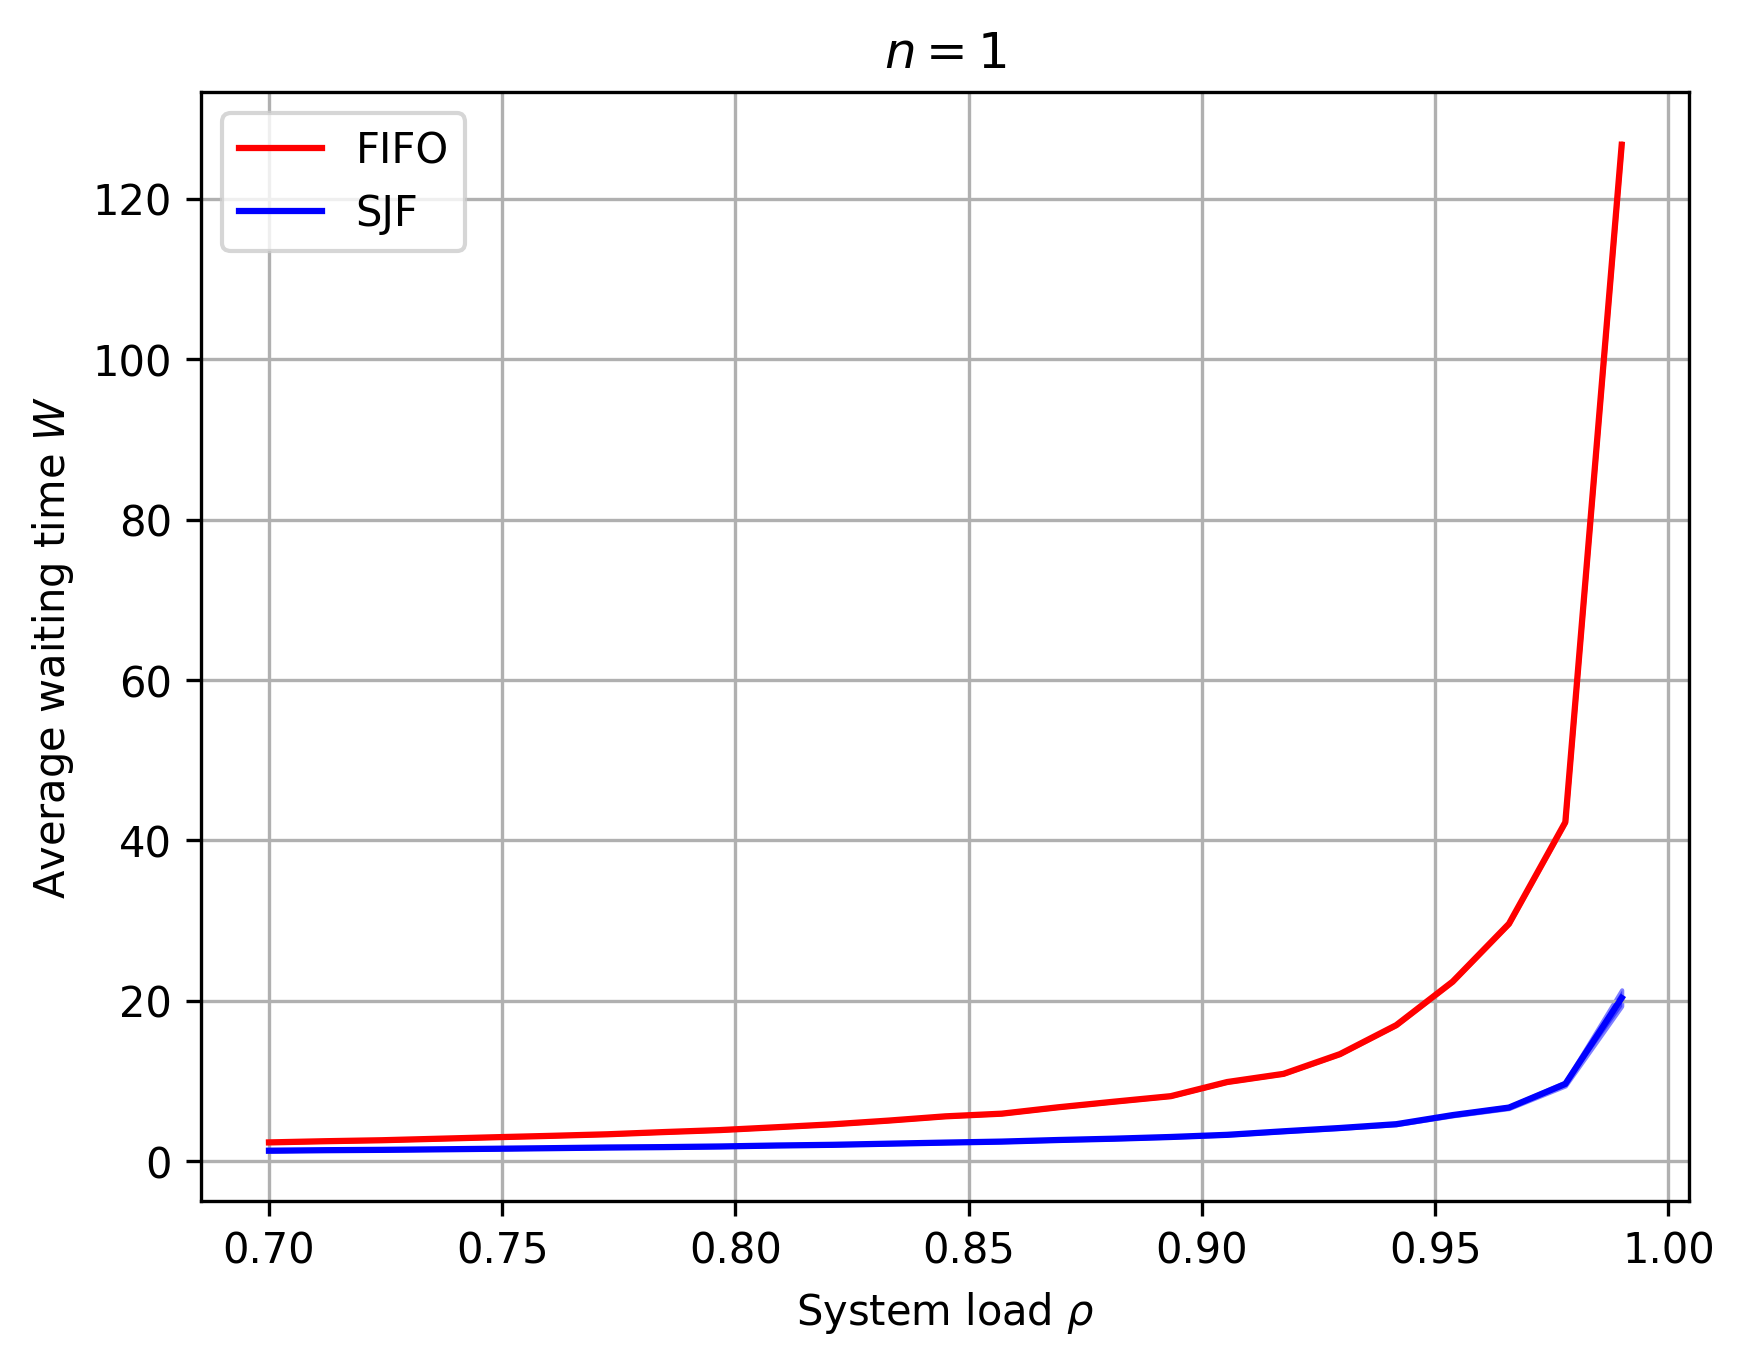

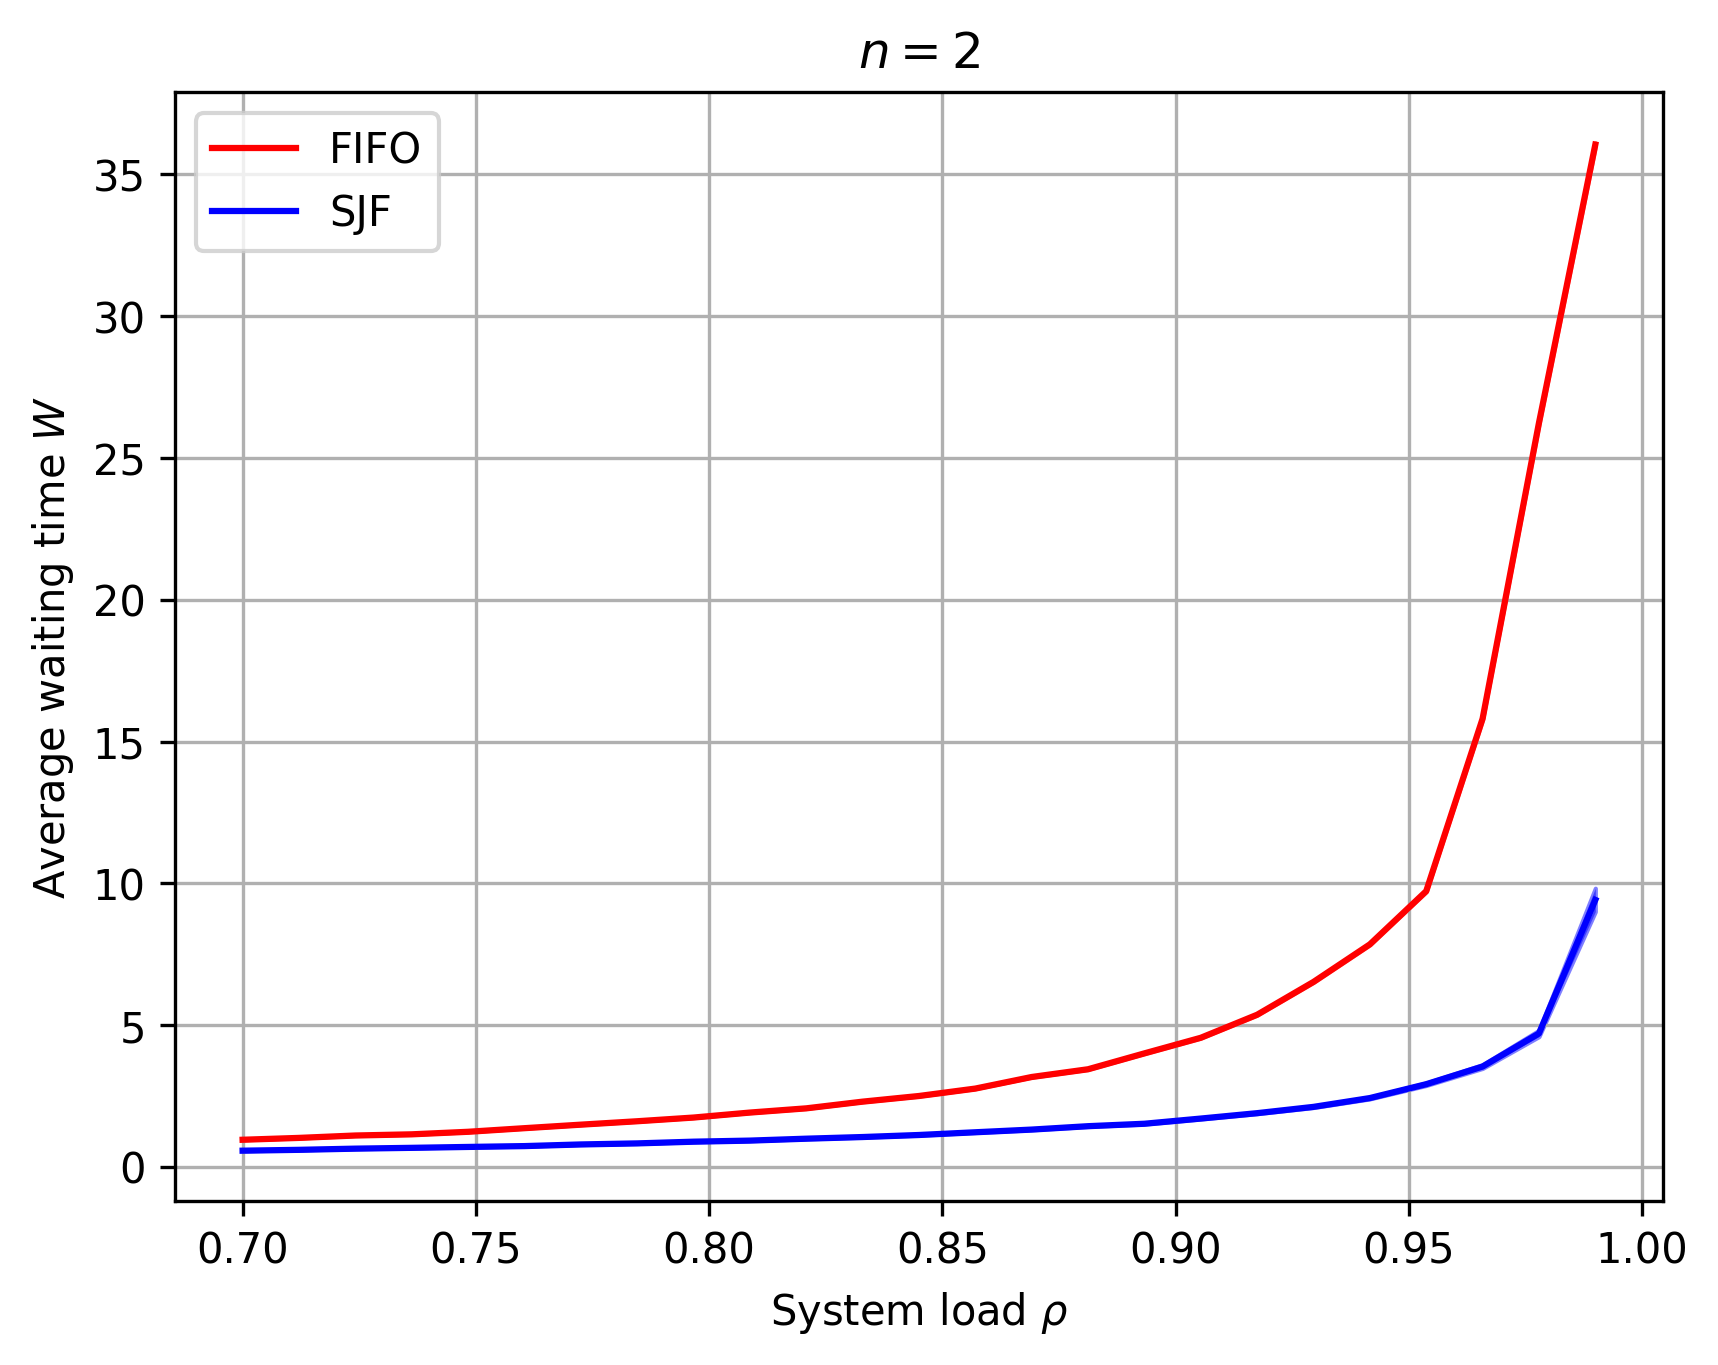

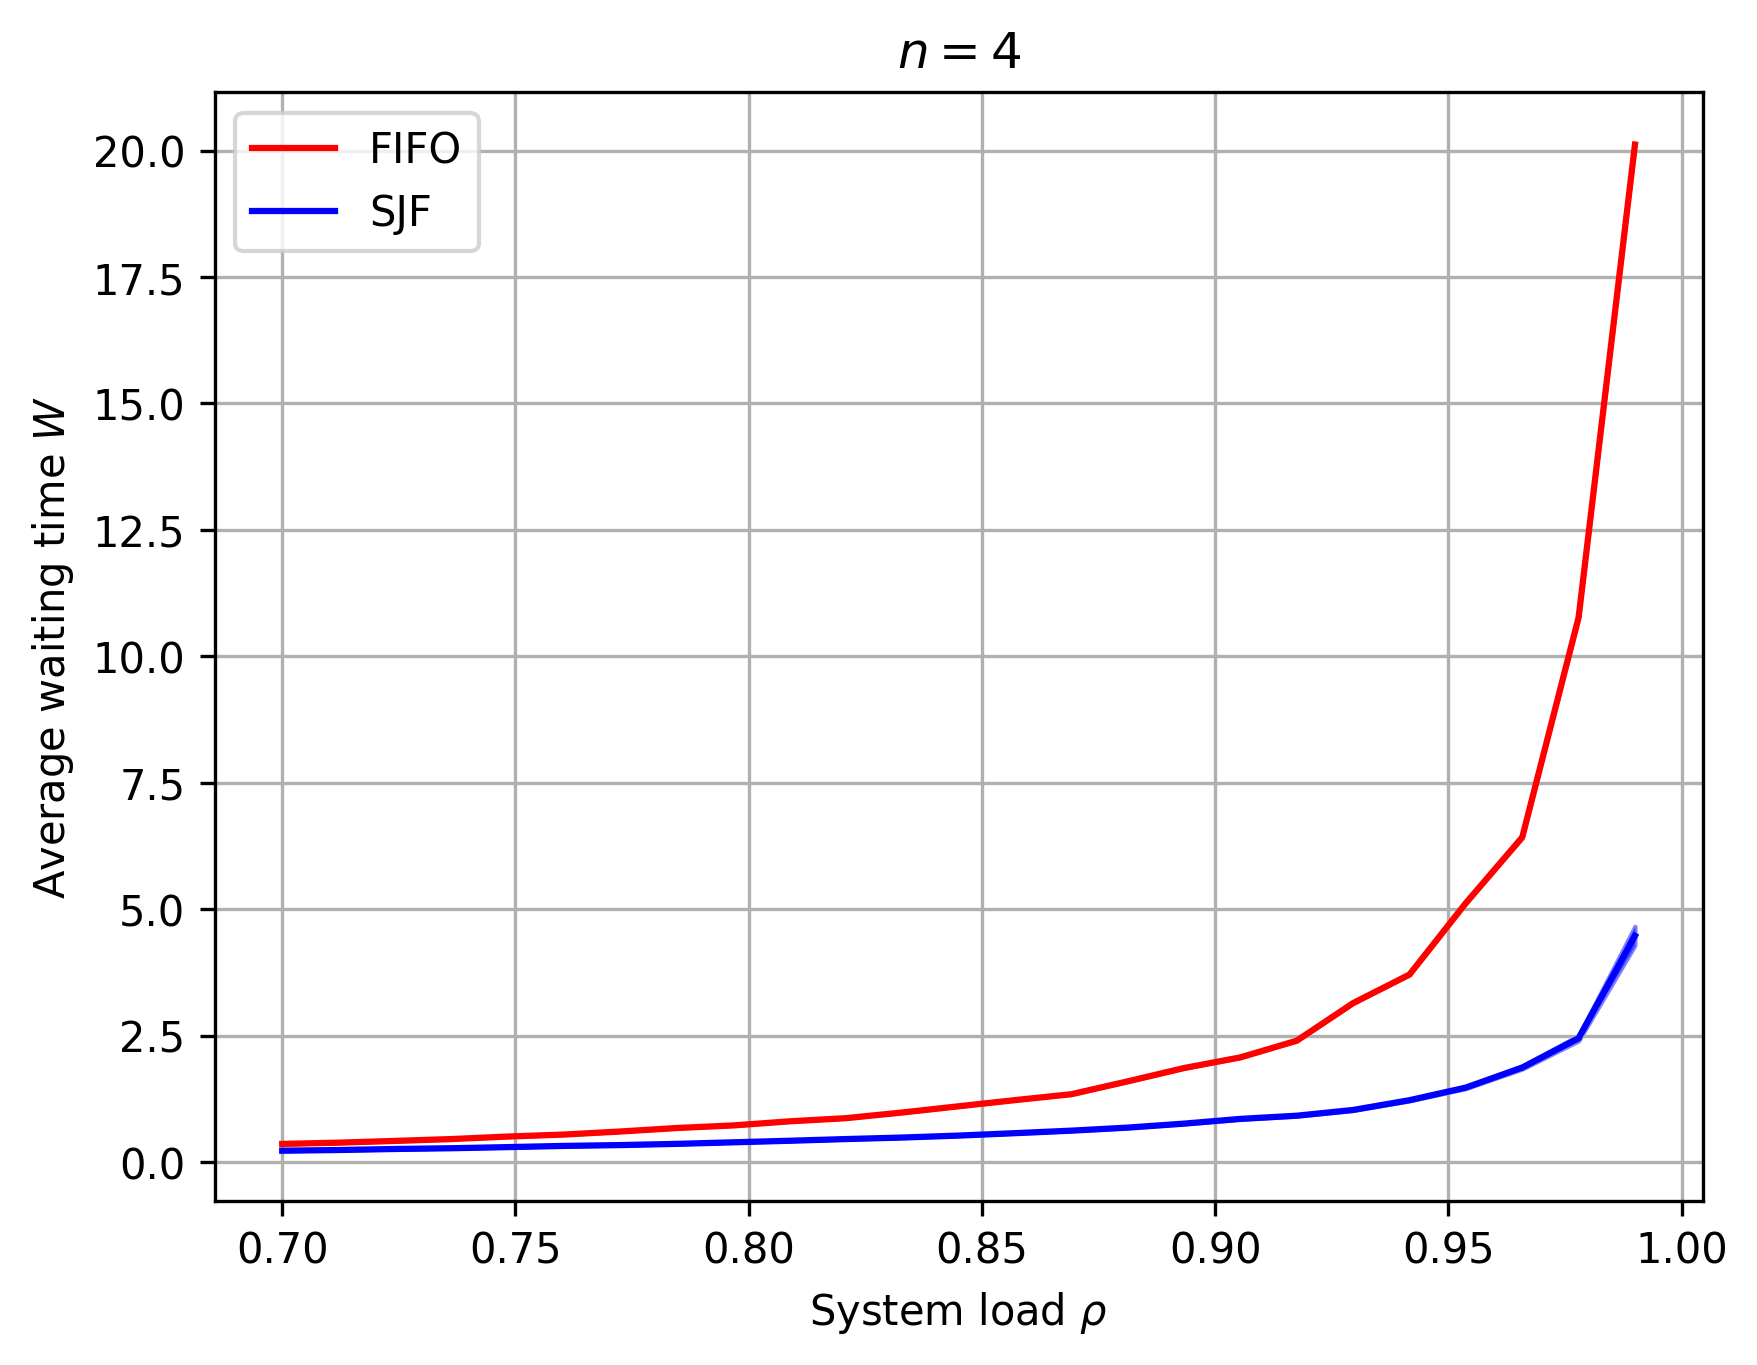

In [16]:
for n in ns:
    params = [(customers, mu, n)] * 2
    methods = [simulate_MMn, simulate_MMn_SJF]
    save = 'results/FIFOvsSJF.txt'
    names = ['FIFO', 'SJF']
    colors = ['red', 'blue']
    fig, ax = compare(rhos, params, methods, save, names, colors)
    ax.set_title(f'$n={n}$')
    fig.savefig(f'results/FIFOvsSJF_MM{n}.jpg', dpi=300)

# Problem 4

### M/D/n

Average waiting time: 4.599136138710604 +- 0.009497160894904532
Average waiting time: 4.568208685566728 +- 0.009607825767917758
Average waiting time: 4.493219650220449 +- 0.009420153828456613


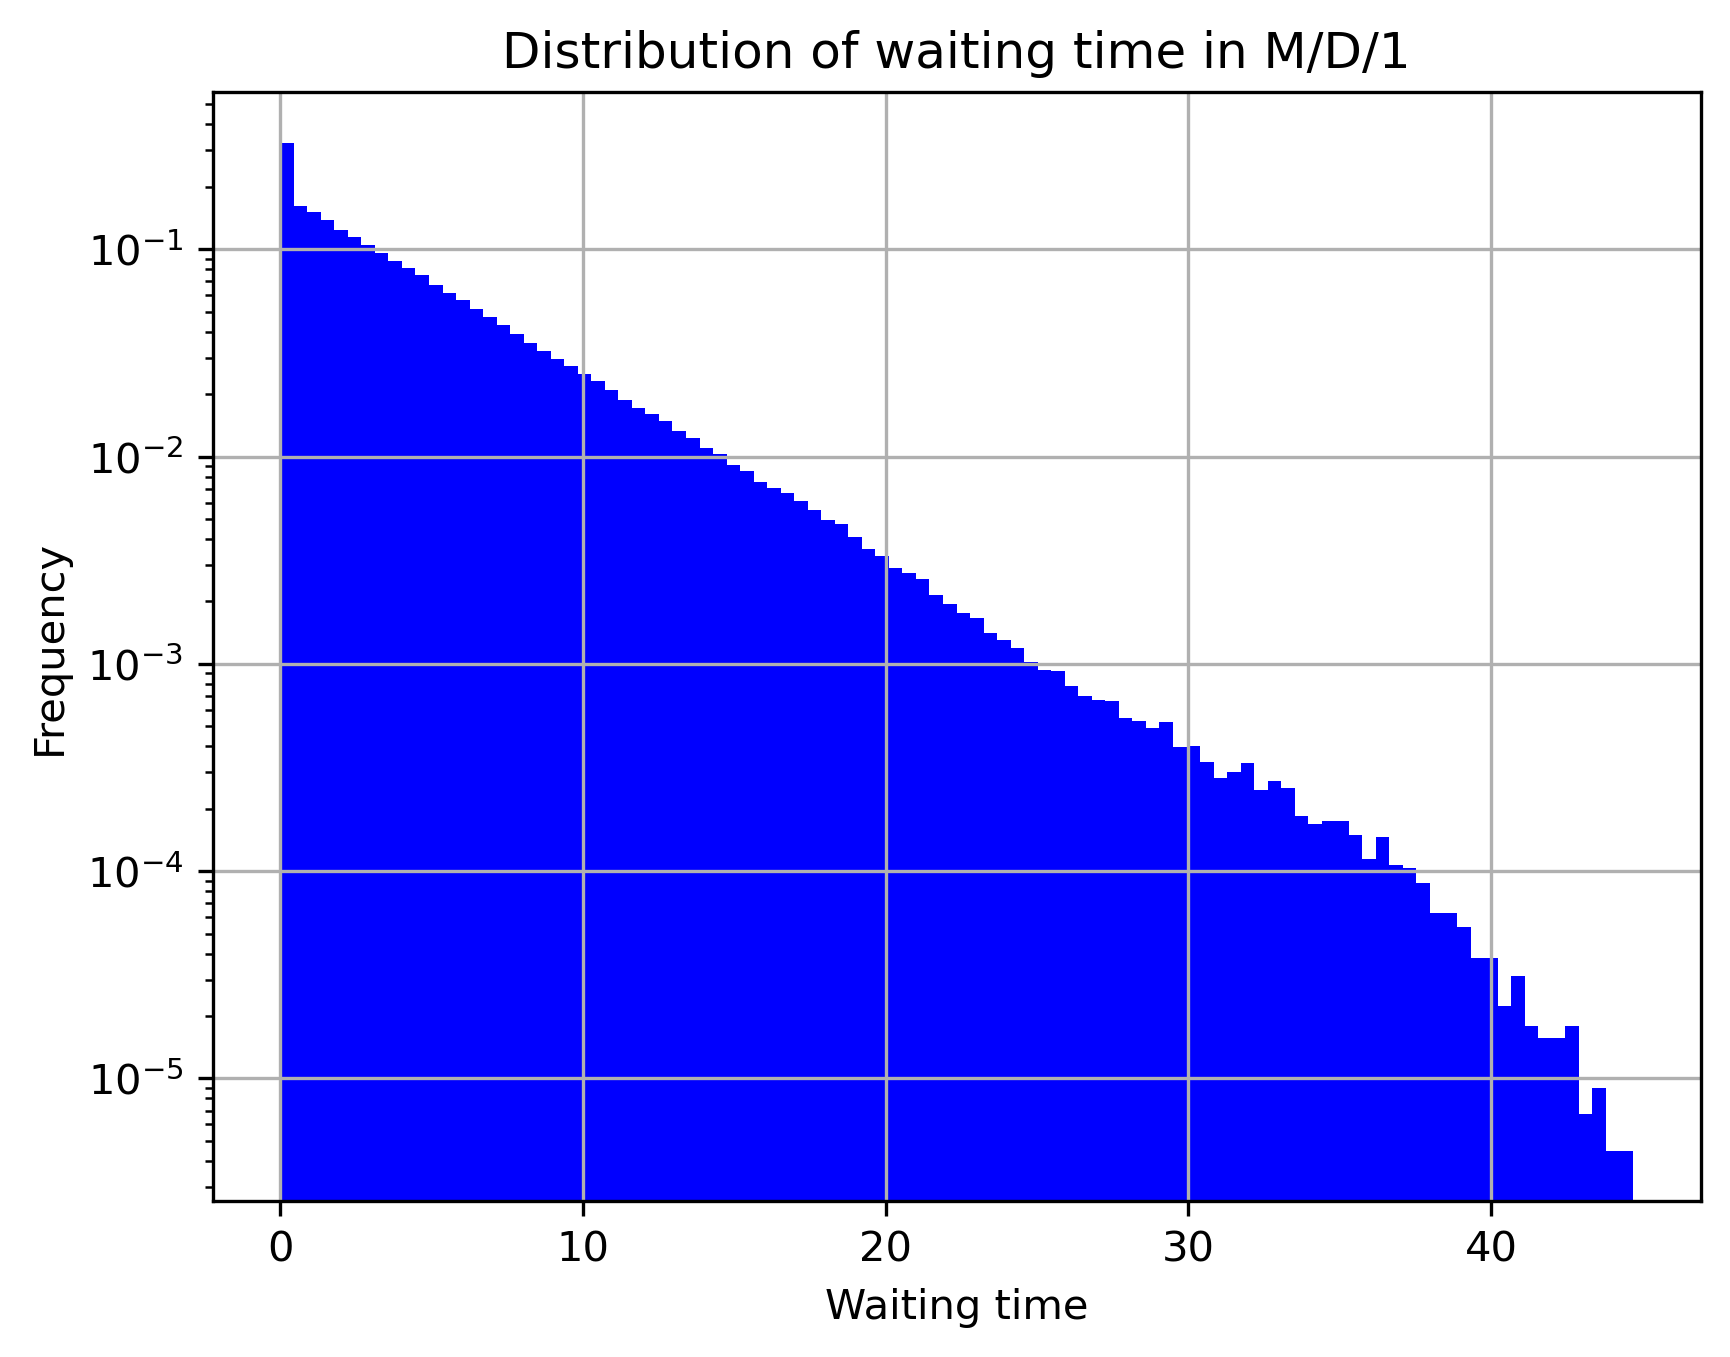

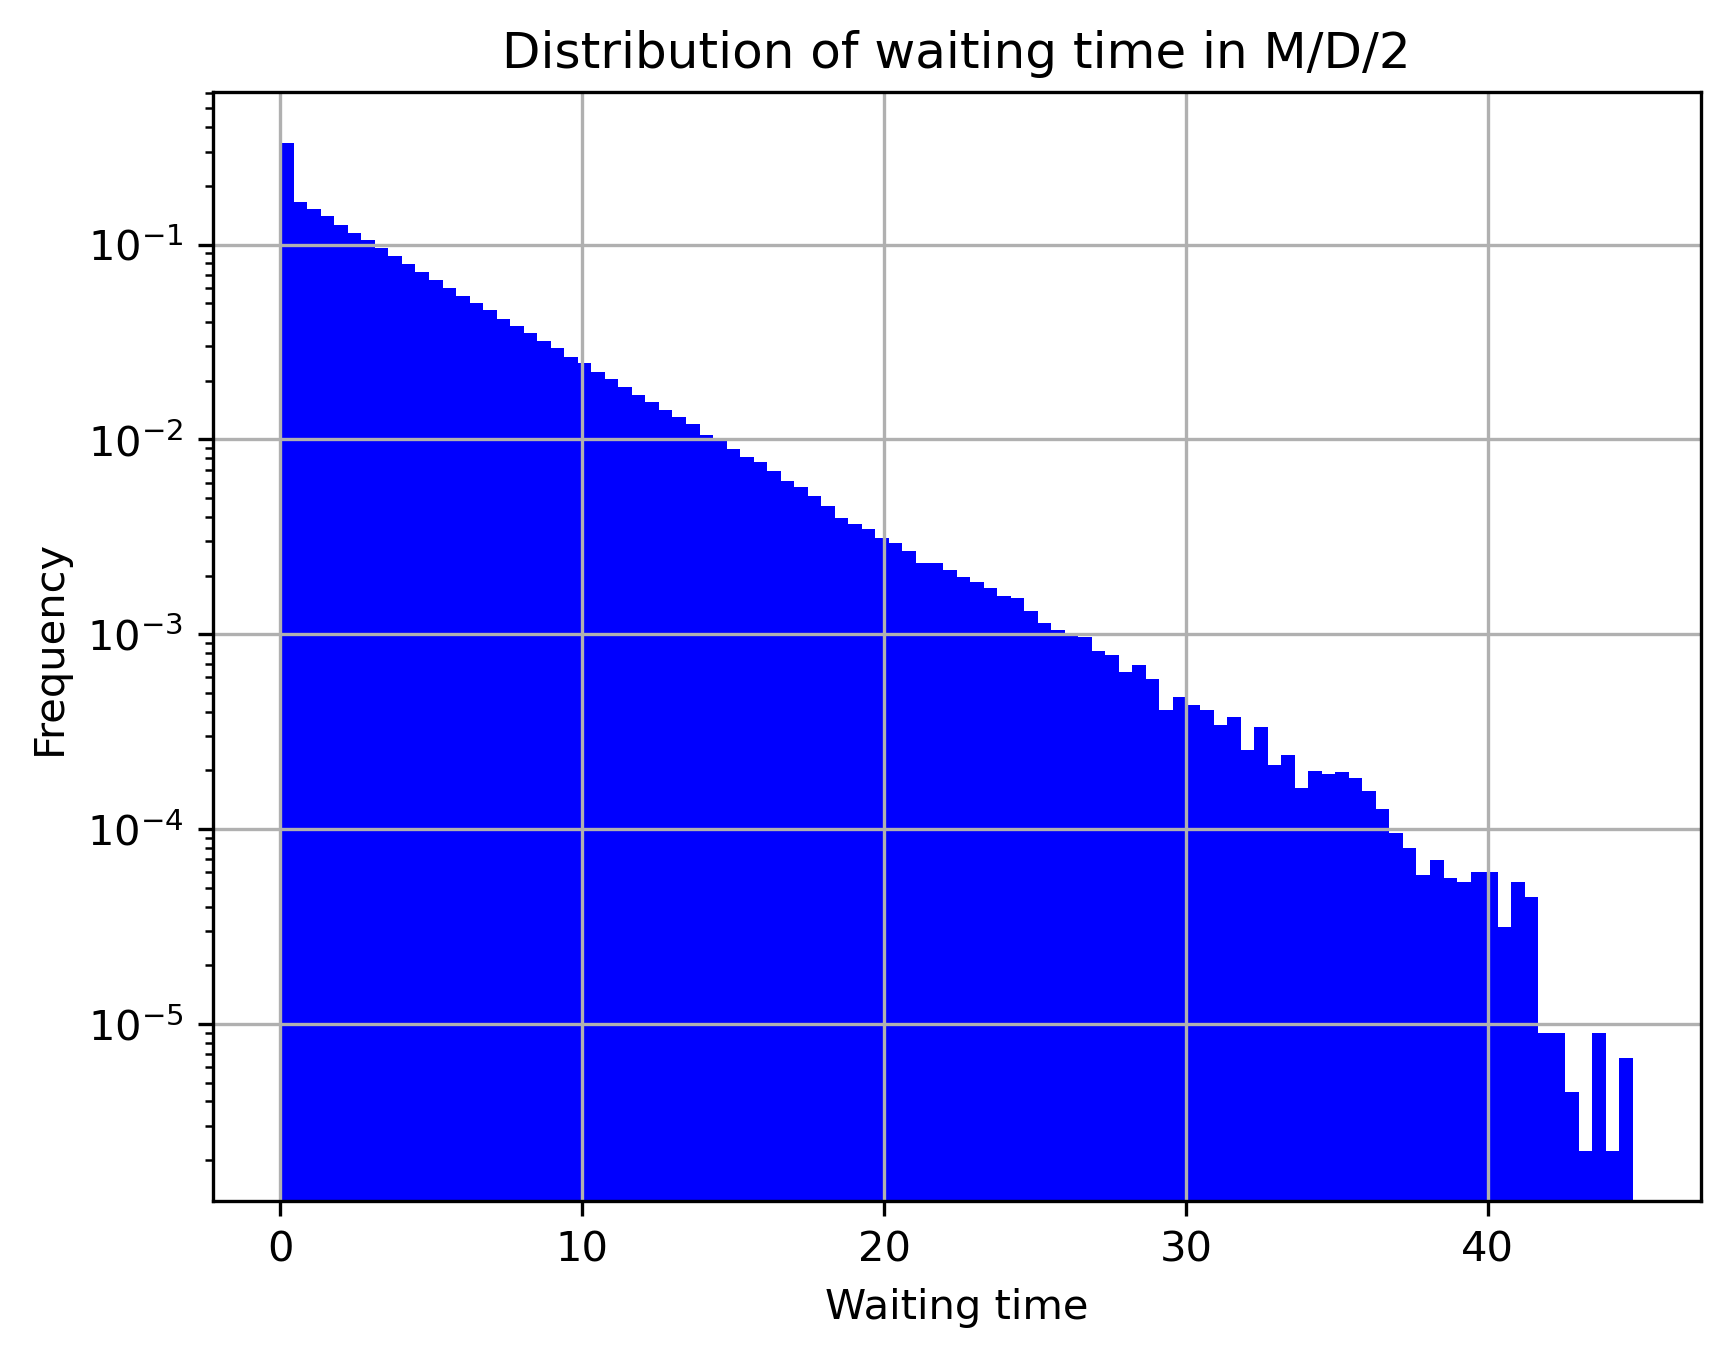

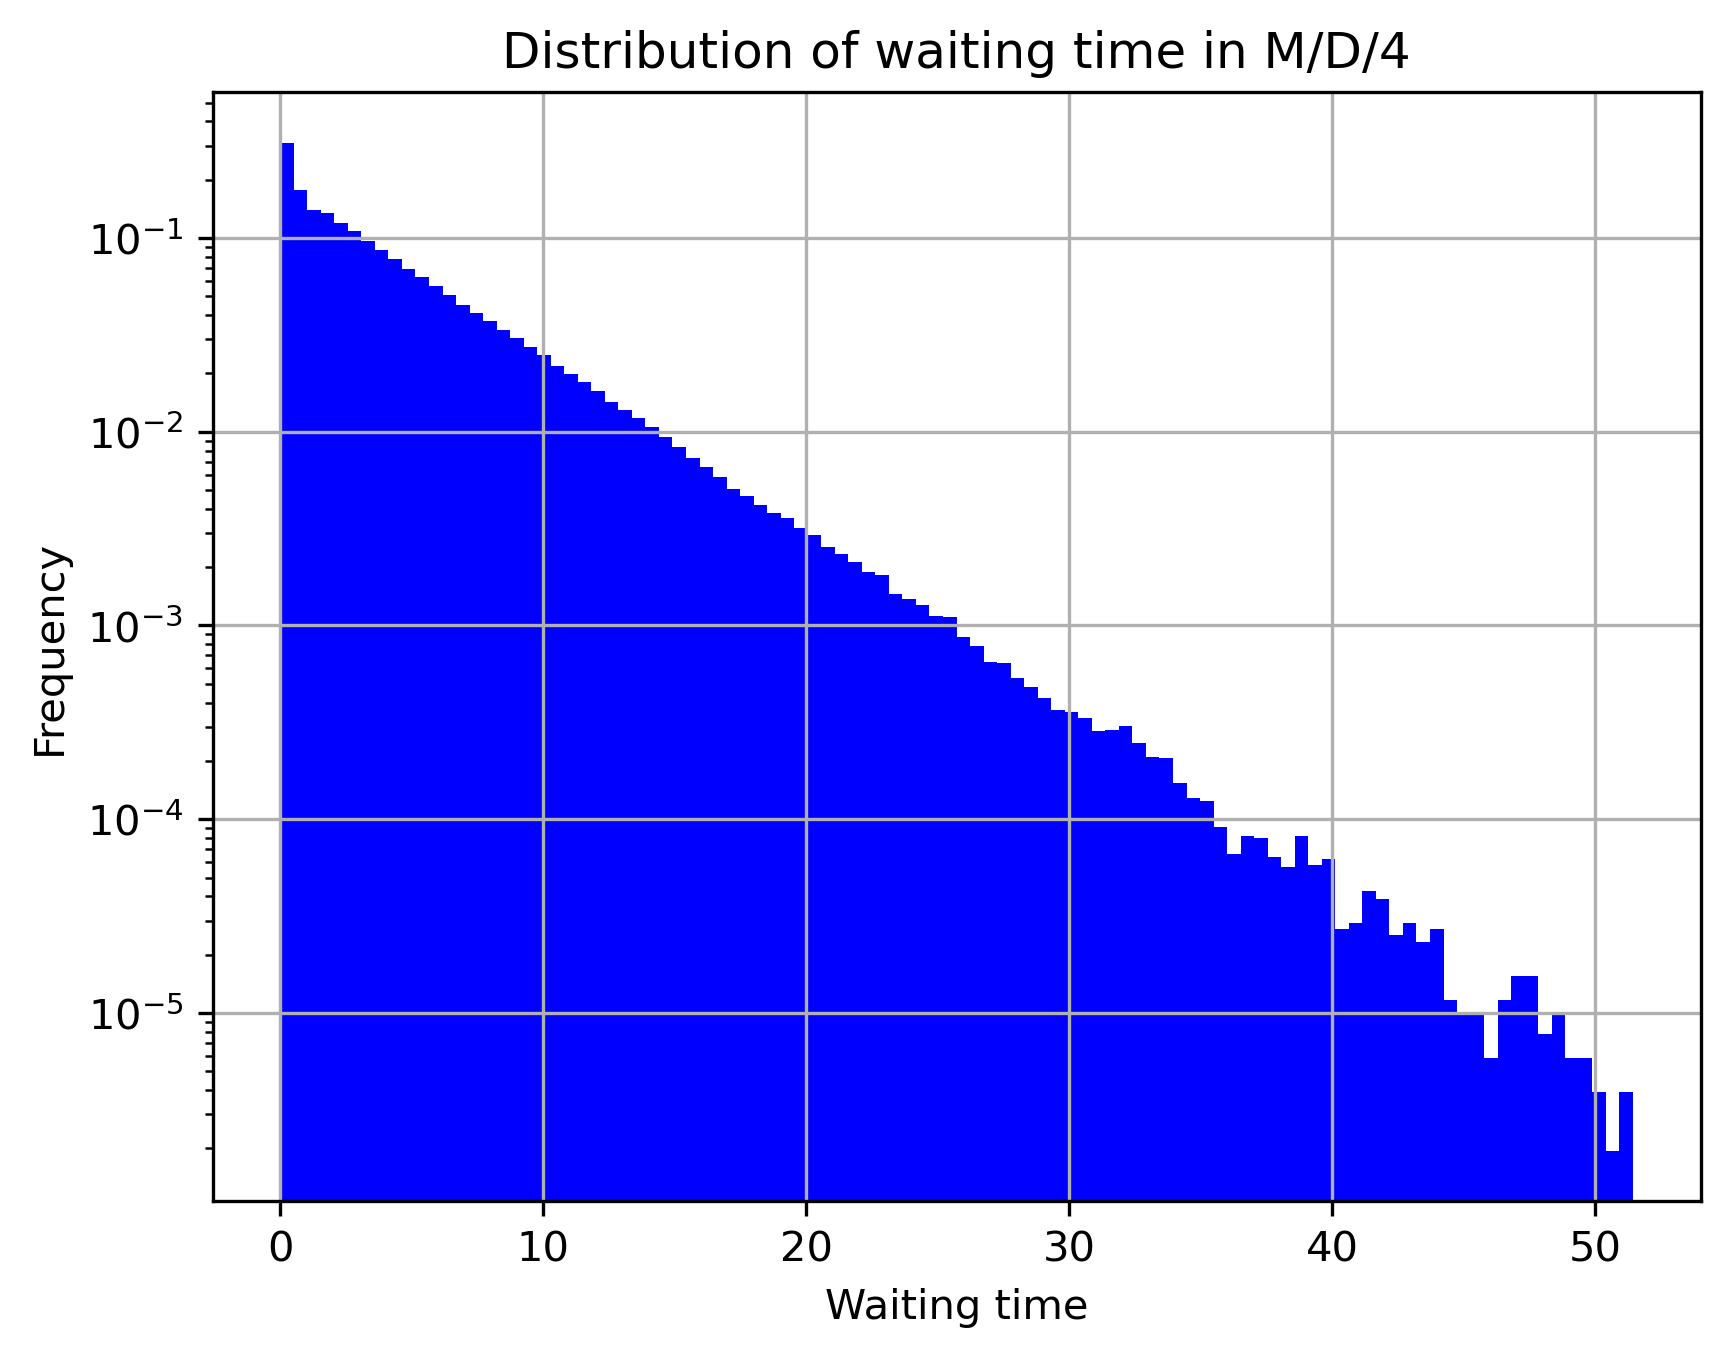

In [7]:
# Parameters
mu = 1
rho = 0.9

# Compare M/D/1 with M/D/n
ns = [1, 2, 4]
for n in ns:
    W = simulate_MDn(customers, rho, mu, 1)
    statistics(W)
    fig, ax = visualize(W, f'Distribution of waiting time in M/D/{n}', yscaling='log')

### M/L/n

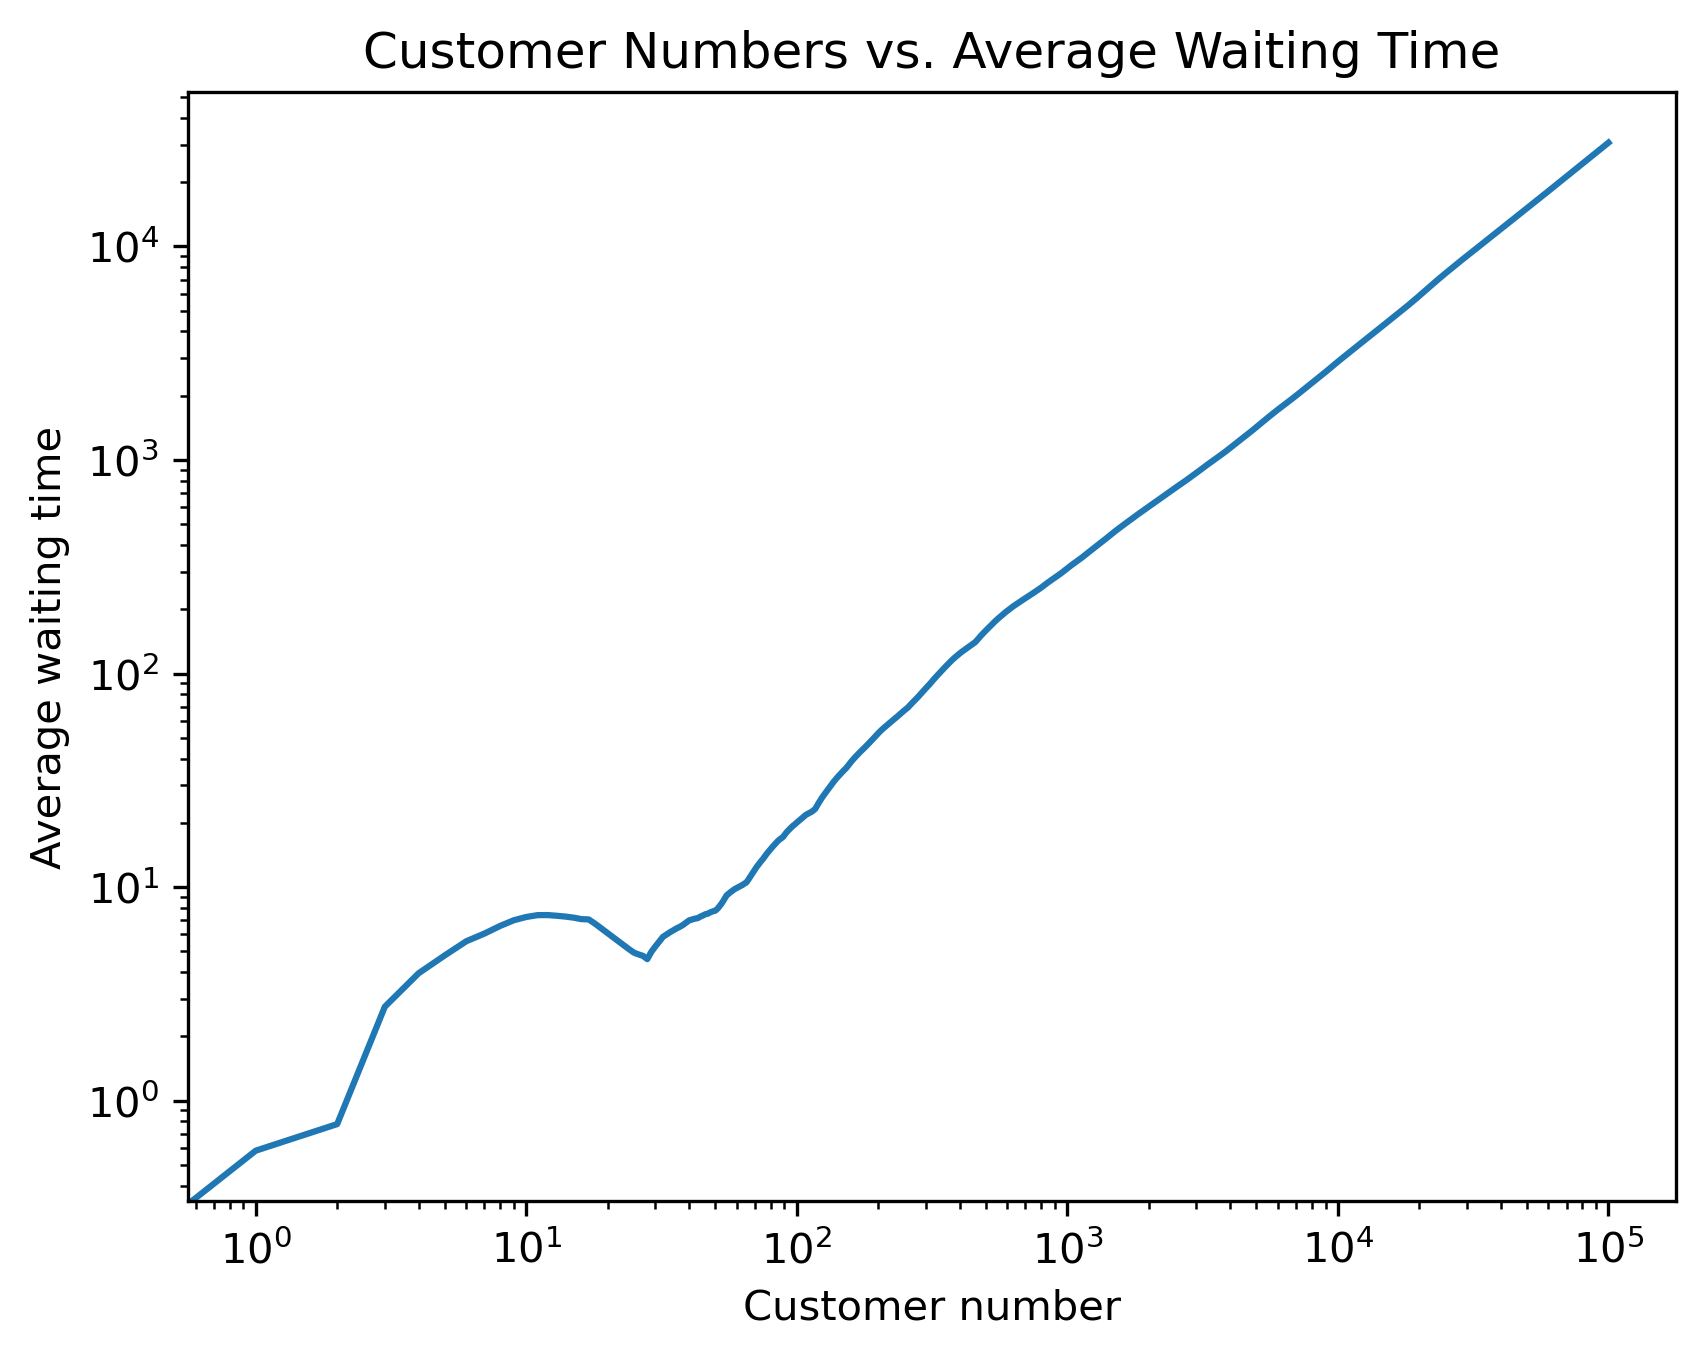

In [4]:
# How does the average waiting time change with customer number

# Parameters
rho = 0.9
mu = [1., 1/5]
p = 0.75
w = simulate_MLn(customers, rho, mu, p, 1)

# Get means
waiting_means = np.cumsum(w) / np.arange(1, customers + 1)

plt.figure(dpi=300)
plt.title('Customer Numbers vs. Average Waiting Time')
plt.ylabel('Average waiting time')
plt.xlabel('Customer number')
plt.plot(waiting_means)
plt.xscale('log')
plt.yscale('log')
plt.show()

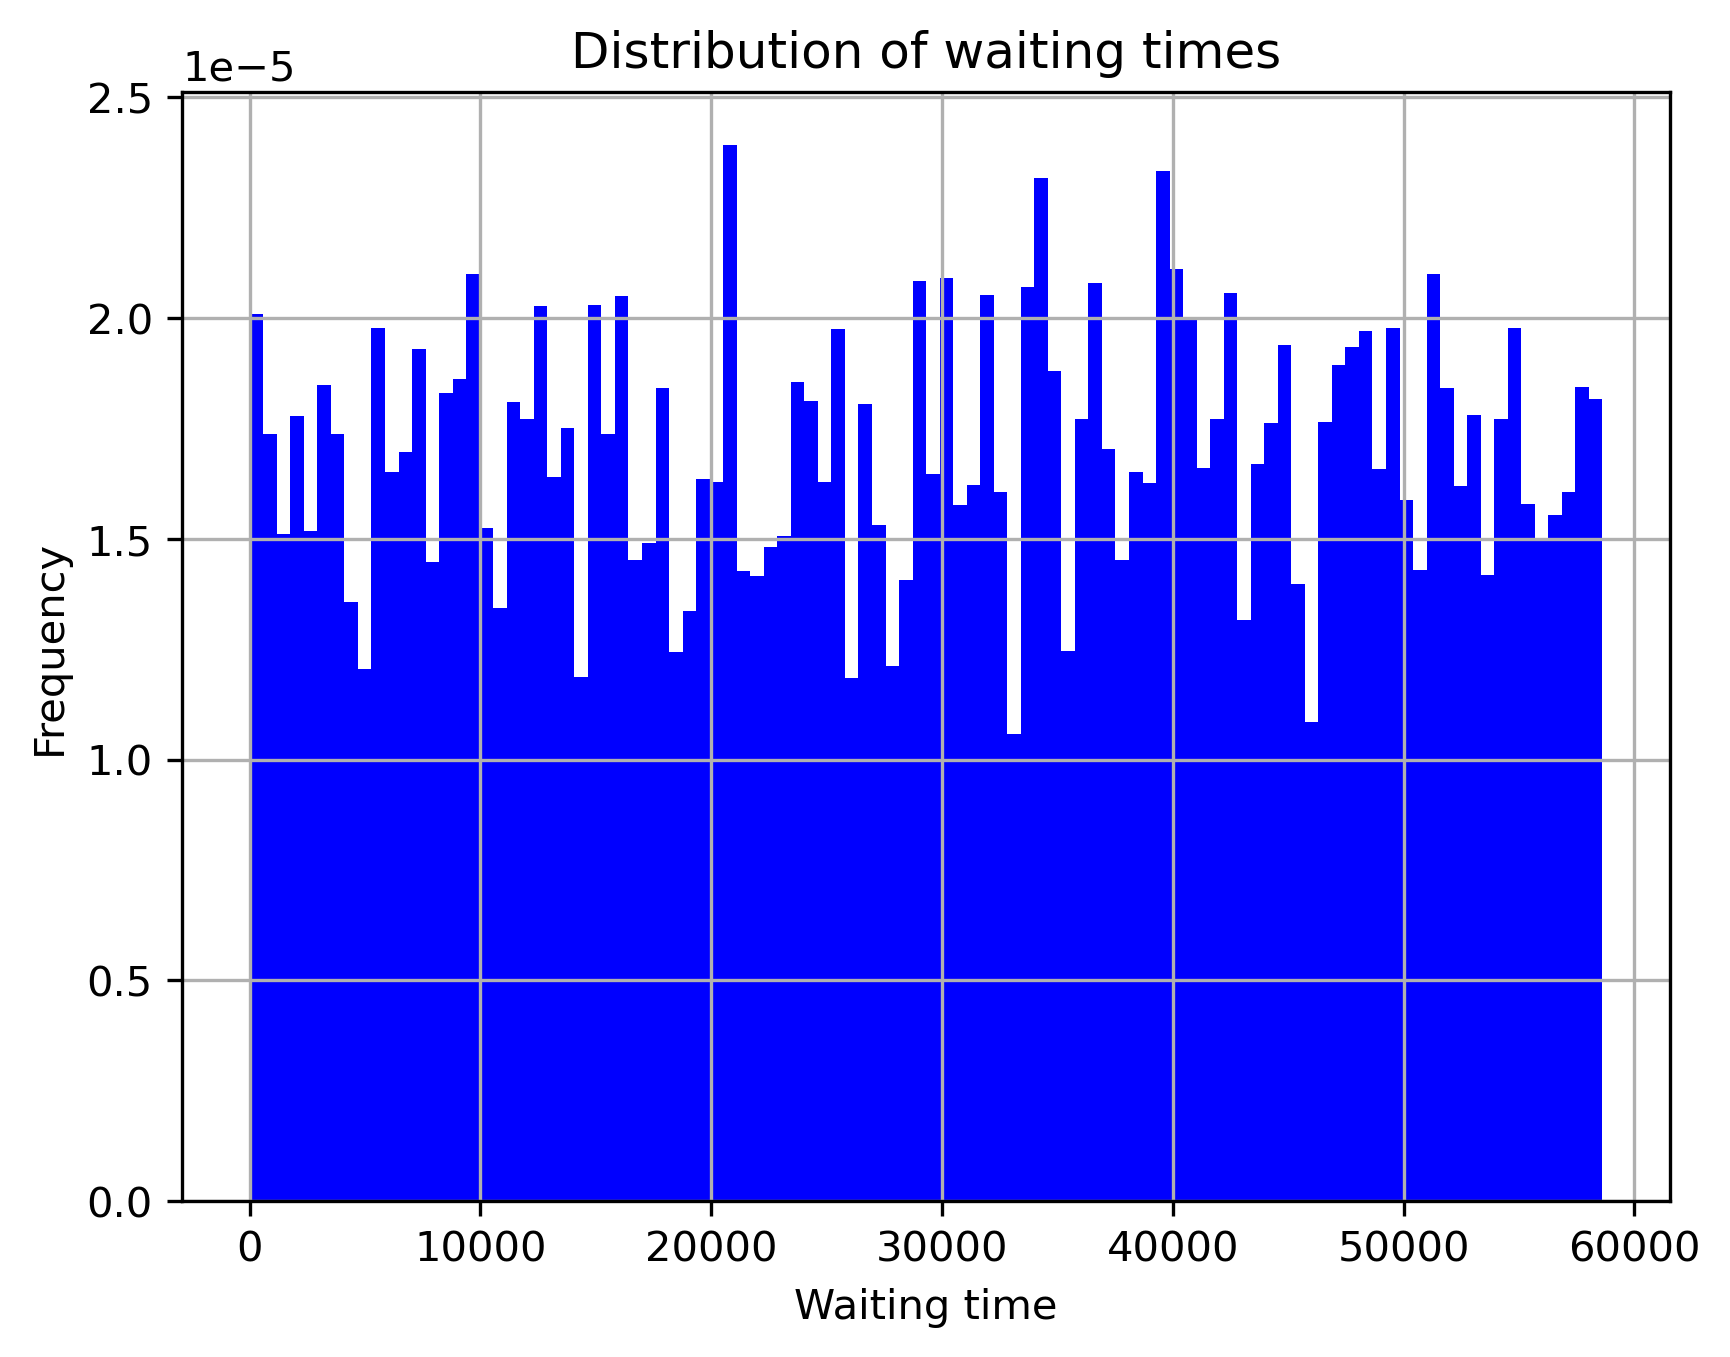

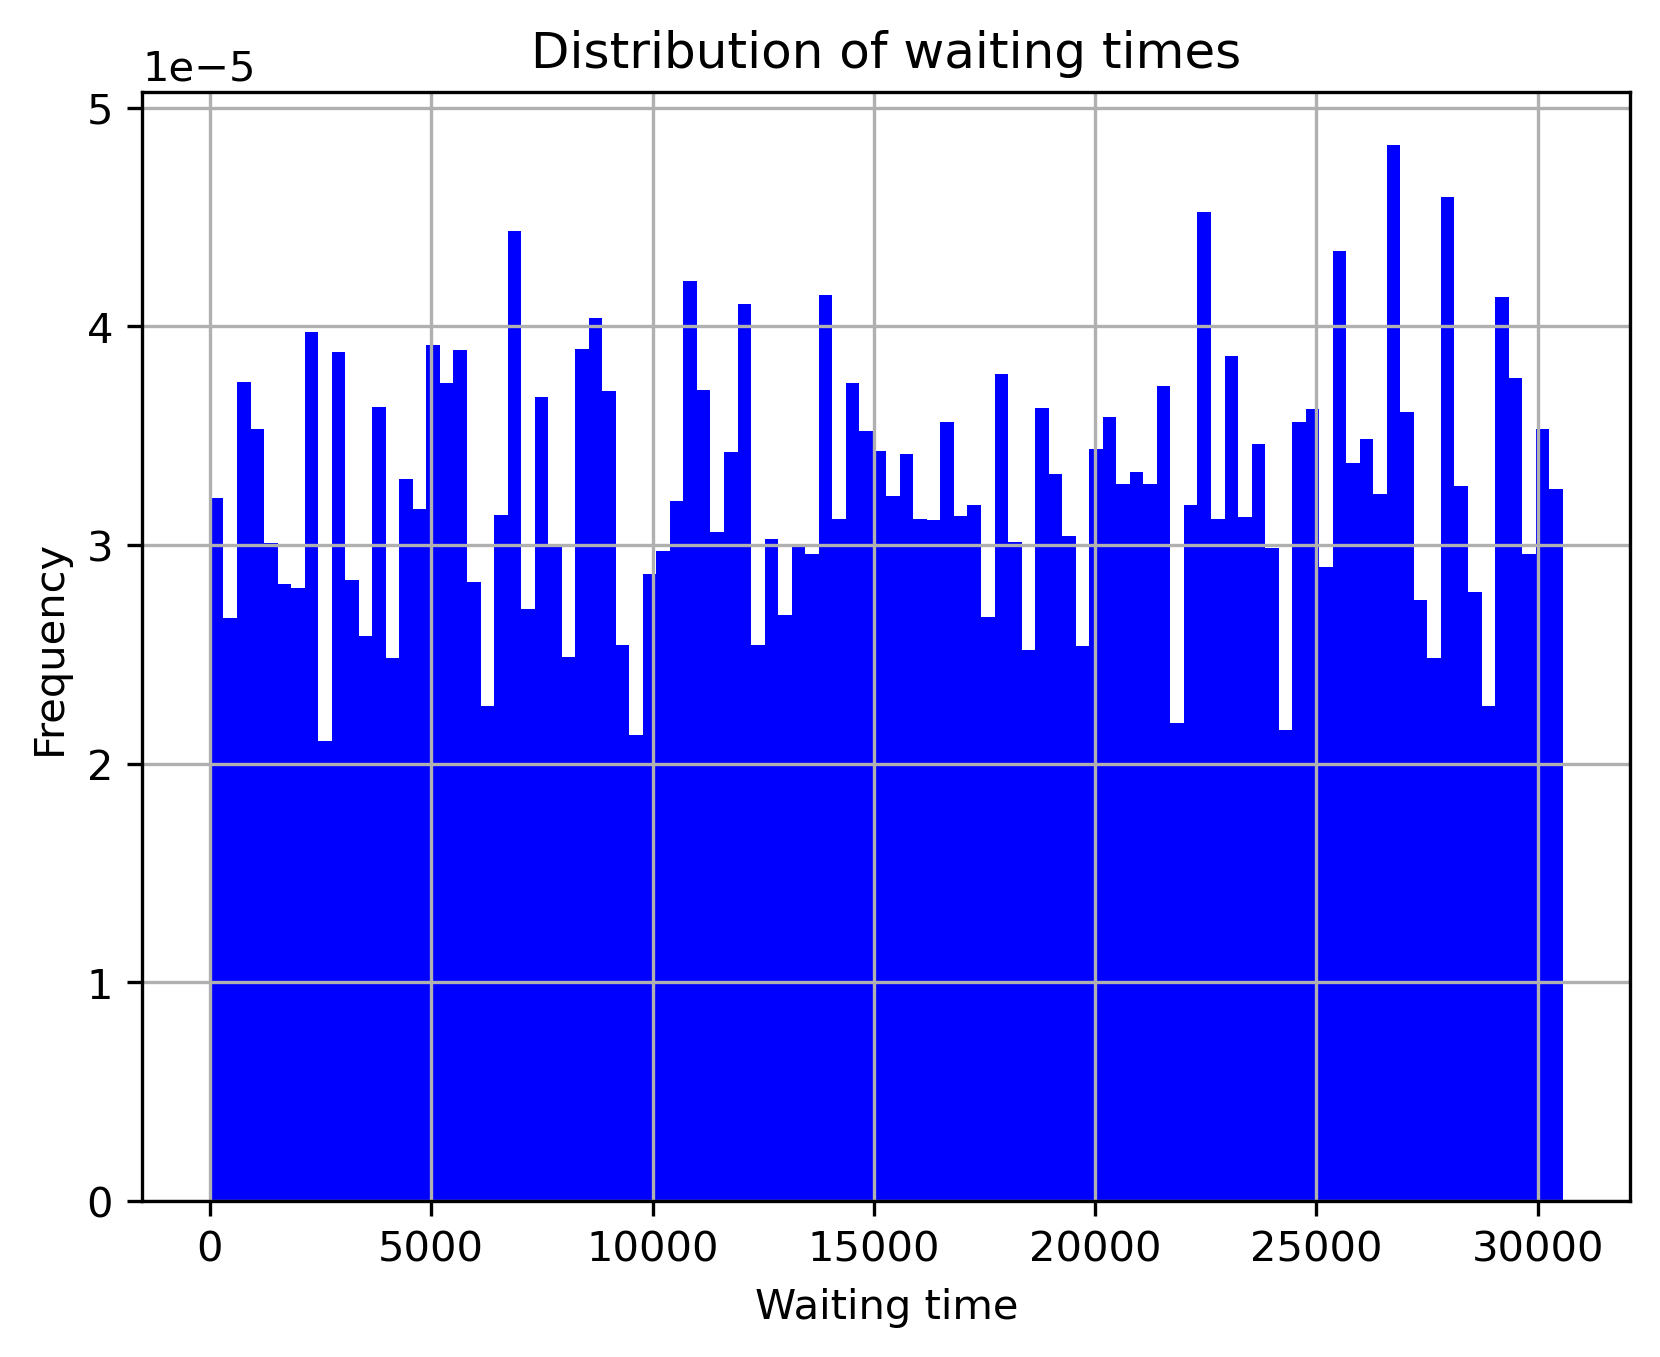

In [5]:
# Show the distributions of waiting times in M/L/1 and M/L/n
waiting = simulate_MLn(customers, rho, mu, p, 1)
fig, ax = visualize(waiting)

waiting = simulate_MLn(customers, rho, mu, p, 2)
fig, ax = visualize(waiting)